# Modèle pre-entrainer DENSE121 : classification binaire COVID / SAIN (NORMAL) par extraction de features

In [1]:
# Chargement des modules necessaire :

import os
import tensorflow as tf
import random
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.models import Model

In [3]:
# On declare les chemins vers les donnees :

Image = 'Data'
        
train_data_dir = 'Data/TRAIN'
validation_data_dir = 'Data/VALIDATION'
test_data_dir = 'Data/TEST'

# Dimmension et path :
img_width, img_height = 224, 224

ImageTRAINCOVID = os.listdir(Image + '/TRAIN/COVID19')
ImageTRAINNORMAL = os.listdir(Image + '/TRAIN/NORMAL')

ImageVALIDATIONCOVID = os.listdir(Image + '/VALIDATION/COVID19')
ImageVALIDATIONNORMAL = os.listdir(Image + '/VALIDATION/NORMAL')

ImageTESTCOVID = os.listdir(Image + '/TEST/COVID19')
ImageTESTNORMAL = os.listdir(Image + '/TEST/NORMAL')

print('Il y a ' + str(len(ImageTRAINCOVID)) + ' images d\'entrainement de patient covid.') 
print('Il y a ' + str(len(ImageTRAINNORMAL)) + ' images d\'entrainement de patient non-covid.') 
print('Il y a ' + str(len(ImageVALIDATIONCOVID)) + ' images de validation de patient covid.') 
print('Il y a ' + str(len(ImageVALIDATIONNORMAL)) + ' images de validation de patient non-covid.') 
print('Il y a ' + str(len(ImageTESTCOVID)) + ' images test de patient covid.') 
print('Il y a ' + str(len(ImageTESTNORMAL)) + ' images test de patient non-covid.') 

Il y a 460 images d'entrainement de patient covid.
Il y a 1266 images d'entrainement de patient non-covid.
Il y a 116 images de validation de patient covid.
Il y a 317 images de validation de patient non-covid.
Il y a 219 images test de patient covid.
Il y a 1341 images test de patient non-covid.


TRAIN COVID


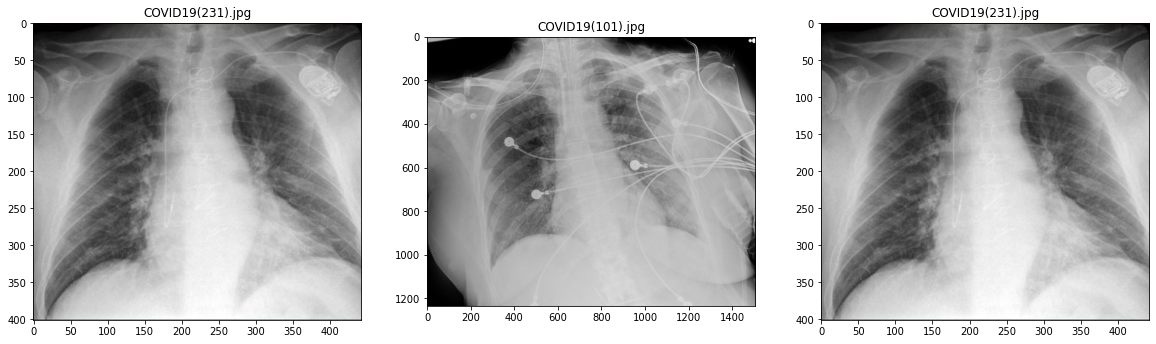

TEST COVID


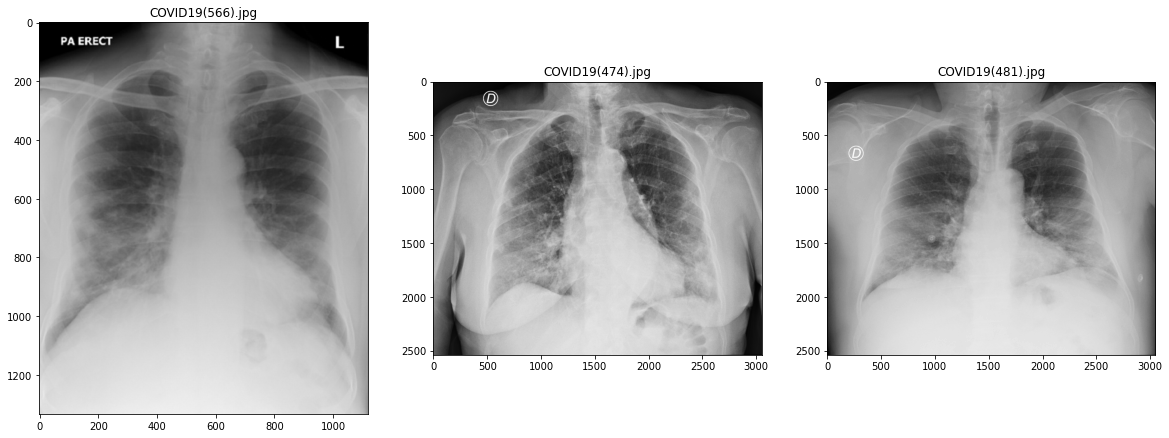

TRAIN NORMAL


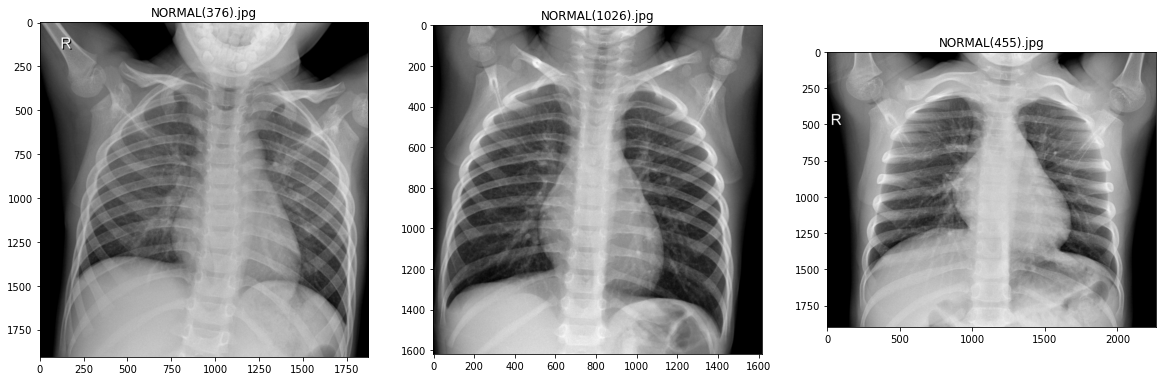

TEST NORMAL


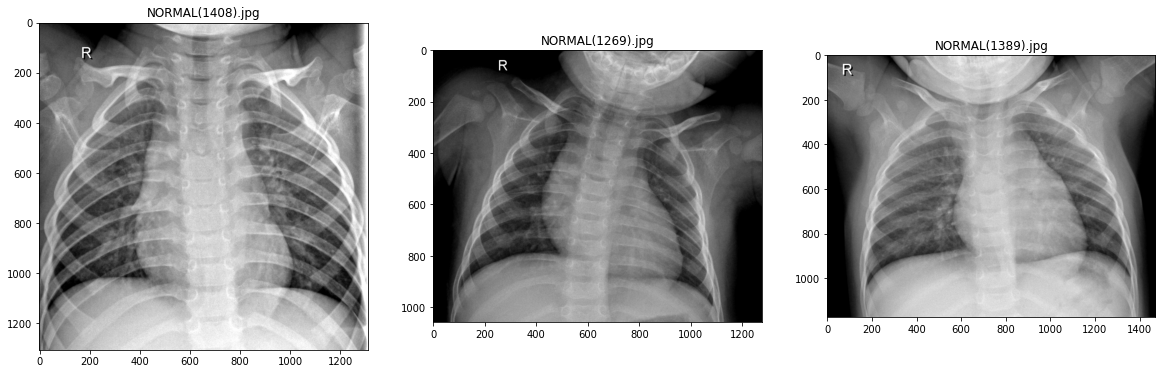

In [5]:
# Visualisation de 6 exemples en 2 lignes et 3 colonnes pour chaque classe :

# TRAIN :

print("TRAIN COVID")


# COVID  :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTRAINCOVID = random.choice(os.listdir(train_data_dir + '/COVID19'))
    plt.imshow(plt.imread(os.path.join( train_data_dir +'/COVID19',randomImageTRAINCOVID)), cmap='gray')
    plt.title(randomImageTRAINCOVID)
    
plt.show()

print("TEST COVID")
# COVID  :
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTESTCOVID = random.choice(os.listdir(validation_data_dir + '/COVID19'))
    plt.imshow(plt.imread(os.path.join(validation_data_dir +'/COVID19',randomImageTESTCOVID)), cmap='gray')
    plt.title(randomImageTESTCOVID)
    
plt.show()

print("TRAIN NORMAL")
# NORMAL :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTRAINNORMAL = random.choice(os.listdir(train_data_dir + '/NORMAL'))
    plt.imshow(plt.imread(os.path.join( train_data_dir +'/NORMAL',randomImageTRAINNORMAL)), cmap='gray')
    plt.title(randomImageTRAINNORMAL)
    
plt.show()


# TEST:

print("TEST NORMAL")

# NORMAL :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTESTNORMAL = random.choice(os.listdir(validation_data_dir + '/NORMAL'))
    plt.imshow(plt.imread(os.path.join(validation_data_dir +'/NORMAL',randomImageTESTNORMAL)), cmap='gray')
    plt.title(randomImageTESTNORMAL)
    
plt.show()

In [6]:
# Preprocessing :
# On rescale les images :
datagen = ImageDataGenerator(rescale=1./255)

# On definit la batch size :
batch_size = 32

# On prepare les tableaux de donnees depuis les images :
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 1726 images belonging to 2 classes.
Found 433 images belonging to 2 classes.
Found 1560 images belonging to 2 classes.


In [7]:
# Chargement de DENSE121 sans la partie fully-connected avec le reseau convolutif :

model_dense = applications.DenseNet121(include_top=False, weights='imagenet')

In [8]:
# On utilse le model VGG16 pour extraire les features de nos images 
# (on fait recupere la sortie du reseau convolutionnel) :
train_features = model_dense.predict_generator(train_generator, 1726 // batch_size)

validation_features = model_dense.predict_generator(validation_generator, 433 // batch_size)

test_features = model_dense.predict_generator(test_generator,1560 // batch_size)

# L'opération étant longue on enregistre les features obtenus :
np.save(open('models/trainFeatures_DENSE121_AllData.npy', 'wb'), train_features) # ecriture en binaire necessaire
np.save(open('models/validationFeatures_DENSE121_AllData.npy', 'wb'), validation_features) # Idem
np.save(open('models/testFeatures_DENSE121_AllData.npy', 'wb'), test_features) # Idem

/Users/chourouk/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [9]:
# Si l'operation à deja été effectuer on charge les features :

train_features = np.load(open('models/trainFeatures_DENSE121_AllData.npy', 'rb'))
validation_features = np.load(open('models/validationFeatures_DENSE121_AllData.npy', 'rb'))
test_features = np.load(open('models/testFeatures_DENSE121_AllData.npy', 'rb'))

In [10]:
# On definit les labels :

train_labels = np.array([0] * 448 + [1] * 1248)
validation_labels = np.array([0] * 116 + [1] * 300)
test_labels = np.array([0] * 219 + [1] * 1317)

# On peut maintenat tester plusieurs couches fully-connected à partir de ce modele :

In [11]:
# Premier modele : 
model_top1 = Sequential()
model_top1.add(Flatten(input_shape=train_features.shape[1:]))
model_top1.add(Dense(64, activation='relu'))
model_top1.add(Dropout(0.5))
model_top1.add(Dense(1, activation='sigmoid'))


# On compile :
model_top1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# On affiche :
model_top1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3211328   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 3,211,393
Trainable params: 3,211,393
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Second modele :
model_top2 = Sequential()
model_top2.add(Flatten(input_shape=train_features.shape[1:]))
model_top2.add(Dense(128, activation='relu'))
model_top2.add(Dropout(0.5))
model_top2.add(Dense(1, activation='sigmoid'))

# On compile :
model_top2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# On affiche :
model_top2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6422656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 6,422,785
Trainable params: 6,422,785
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Troisieme modele :
model_top3 = Sequential()
model_top3.add(Flatten(input_shape=train_features.shape[1:]))
model_top3.add(Dense(256, activation='relu'))
model_top3.add(Dropout(0.5))
model_top3.add(Dense(1, activation='sigmoid'))

# On compile :
model_top3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# On affiche :
model_top3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 12,845,569
Trainable params: 12,845,569
Non-trainable params: 0
_________________________________________________________________


In [14]:
# On definit les parametres pour l'entrainement :
epochs = 100

# On definit les callbacks : 
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience = 10,restore_best_weights=True,),
]

In [15]:
# On entraine le modèle 1 :

history1 = model_top1.fit(train_features, train_labels,
        epochs=epochs,
        callbacks=my_callbacks,
        batch_size=batch_size,
        validation_data=(validation_features, validation_labels))

Epoch 1/100
53/53 [==============================] - 13s 174ms/step - loss: 7.8199 - accuracy: 0.8375 - val_loss: 0.2954 - val_accuracy: 0.9471
Epoch 2/100
53/53 [==============================] - 4s 73ms/step - loss: 0.1979 - accuracy: 0.9636 - val_loss: 0.0842 - val_accuracy: 0.9712
Epoch 3/100
53/53 [==============================] - 4s 85ms/step - loss: 0.4814 - accuracy: 0.9553 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 4/100
53/53 [==============================] - 5s 93ms/step - loss: 0.2417 - accuracy: 0.9665 - val_loss: 0.0401 - val_accuracy: 0.9904
Epoch 5/100
53/53 [==============================] - 5s 94ms/step - loss: 0.1343 - accuracy: 0.9796 - val_loss: 0.0478 - val_accuracy: 0.9856
Epoch 6/100
53/53 [==============================] - 5s 98ms/step - loss: 0.0718 - accuracy: 0.9840 - val_loss: 0.0266 - val_accuracy: 0.9928
Epoch 7/100
53/53 [==============================] - 5s 93ms/step - loss: 0.0992 - accuracy: 0.9855 - val_loss: 0.0275 - val_accuracy: 0.9928
Epoc

In [17]:
n_epochs = len(history1.history['loss'])
GenOptimale1 = n_epochs-10
print("la generation optimale est : ",GenOptimale1)
model_top1.save_weights('../memory/Weights/dense121_lightTop_224_224_'+str(GenOptimale1)+'.h5')

la generation optimale est :  12


In [18]:
# On entraine le modèle 2:

history2 = model_top2.fit(train_features, train_labels,
        epochs=epochs, 
        callbacks=my_callbacks,
        batch_size=batch_size,
        validation_data=(validation_features, validation_labels))

Epoch 1/100
53/53 [==============================] - 15s 230ms/step - loss: 5.6309 - accuracy: 0.8576 - val_loss: 0.4454 - val_accuracy: 0.9423
Epoch 2/100
53/53 [==============================] - 14s 262ms/step - loss: 0.1976 - accuracy: 0.9610 - val_loss: 0.0304 - val_accuracy: 0.9880
Epoch 3/100
53/53 [==============================] - 11s 199ms/step - loss: 0.2247 - accuracy: 0.9553 - val_loss: 0.0343 - val_accuracy: 0.9880
Epoch 4/100
53/53 [==============================] - 11s 208ms/step - loss: 0.1802 - accuracy: 0.9688 - val_loss: 0.0395 - val_accuracy: 0.9928
Epoch 5/100
53/53 [==============================] - 12s 220ms/step - loss: 0.1489 - accuracy: 0.9767 - val_loss: 0.0264 - val_accuracy: 0.9928
Epoch 6/100
53/53 [==============================] - 9s 174ms/step - loss: 0.0593 - accuracy: 0.9850 - val_loss: 0.2965 - val_accuracy: 0.9327
Epoch 7/100
53/53 [==============================] - 10s 182ms/step - loss: 0.1691 - accuracy: 0.9704 - val_loss: 0.0331 - val_accuracy: 

In [19]:
n_epochs = len(history2.history['loss'])
GenOptimale2 = n_epochs-10
print("la generation optimale est : ",GenOptimale2)
model_top2.save_weights('../memory/Weights/dense121_mediumTop_224_224_'+str(GenOptimale2)+'.h5')

la generation optimale est :  10


In [20]:
# On entraine le modèle 3:

history3 = model_top3.fit(train_features, train_labels,
        epochs=epochs, 
        callbacks=my_callbacks,
        batch_size=batch_size,
        validation_data=(validation_features, validation_labels))

Epoch 1/100
53/53 [==============================] - 20s 334ms/step - loss: 16.3528 - accuracy: 0.8488 - val_loss: 0.1092 - val_accuracy: 0.9880
Epoch 2/100
53/53 [==============================] - 17s 314ms/step - loss: 0.4566 - accuracy: 0.9709 - val_loss: 0.0312 - val_accuracy: 0.9952
Epoch 3/100
53/53 [==============================] - 15s 281ms/step - loss: 0.2955 - accuracy: 0.9698 - val_loss: 0.0573 - val_accuracy: 0.9880
Epoch 4/100
53/53 [==============================] - 13s 250ms/step - loss: 0.2479 - accuracy: 0.9589 - val_loss: 0.0478 - val_accuracy: 0.9880
Epoch 5/100
53/53 [==============================] - 16s 310ms/step - loss: 0.2072 - accuracy: 0.9783 - val_loss: 0.1453 - val_accuracy: 0.9832
Epoch 6/100
53/53 [==============================] - 16s 303ms/step - loss: 0.2413 - accuracy: 0.9765 - val_loss: 0.0734 - val_accuracy: 0.9928
Epoch 7/100
53/53 [==============================] - 17s 319ms/step - loss: 0.1530 - accuracy: 0.9834 - val_loss: 0.3602 - val_accuracy

In [21]:
n_epochs = len(history3.history['loss'])
GenOptimale3 = n_epochs-10
print("la generation optimale est : ",GenOptimale3)
model_top3.save_weights('../memory/Weights/dense121_heavyTop_224_224_'+str(GenOptimale3)+'.h5')

la generation optimale est :  2


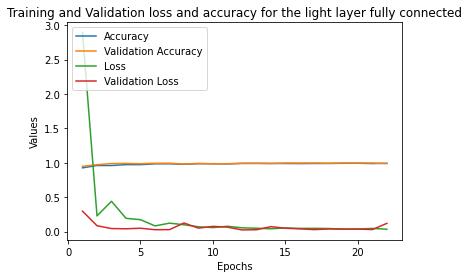

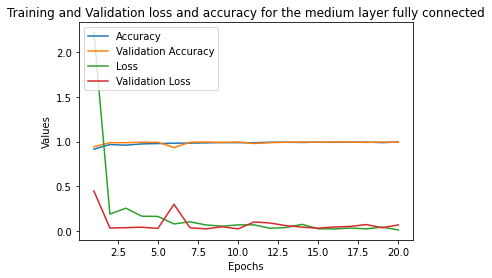

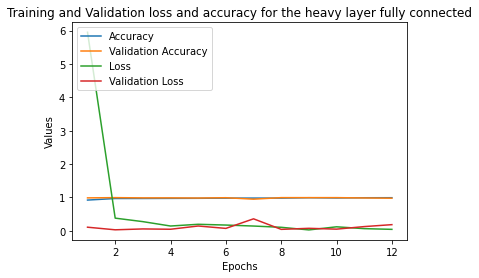

In [23]:
# Visualisation de l'entrainement : 

epochs = range(1,23)
plt.plot(epochs, history1.history['accuracy'], label='Accuracy')
plt.plot(epochs, history1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, history1.history['loss'], label='Loss')
plt.plot(epochs, history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for the light layer fully connected')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,21)
plt.plot(epochs, history2.history['accuracy'], label='Accuracy')
plt.plot(epochs, history2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, history2.history['loss'], label='Loss')
plt.plot(epochs, history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for the medium layer fully connected')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

epochs = range(1,13)
plt.plot(epochs, history3.history['accuracy'], label='Accuracy')
plt.plot(epochs, history3.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, history3.history['loss'], label='Loss')
plt.plot(epochs, history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for the heavy layer fully connected')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()

In [24]:
# On evalue :

# Avec les donnes de validation :

eval1 = model_top1.evaluate(validation_features, validation_labels,verbose=2)
eval2 = model_top2.evaluate(validation_features, validation_labels,verbose=2)
eval3 = model_top3.evaluate(validation_features, validation_labels,verbose=2)

# Avec les donnes de test :
evaltest1 = model_top1.evaluate(test_features, test_labels,verbose=2)
evaltest2 = model_top2.evaluate(test_features, test_labels,verbose=2)
evaltest3 = model_top3.evaluate(test_features, test_labels,verbose=2)


13/13 - 1s - loss: 0.0235 - accuracy: 0.9904
13/13 - 0s - loss: 0.0208 - accuracy: 0.9952
13/13 - 1s - loss: 0.0312 - accuracy: 0.9952
48/48 - 2s - loss: 0.1010 - accuracy: 0.9928
48/48 - 1s - loss: 0.0928 - accuracy: 0.9935
48/48 - 3s - loss: 0.0652 - accuracy: 0.9915


## Enregistrements (facultatifs)

In [26]:
    #On enregistre l'historique:
np.save('../memory/history/historique_chourouk_dense121_224_224_light_'+str(GenOptimale1)+'.npy',history1.history)
np.save('../memory/history/historique_chourouk_dense121_224_224_medium_'+str(GenOptimale2)+'.npy',history2.history)
np.save('../memory/history/historique_chourouk_dense121_224_224_heavy_'+str(GenOptimale3)+'.npy',history3.history)